### 6. Write a program to implement multiple linear regression using iris data set 

Intercept: -1.5940230663274868
Coefficients: [ 0.72659367 -0.47578234]


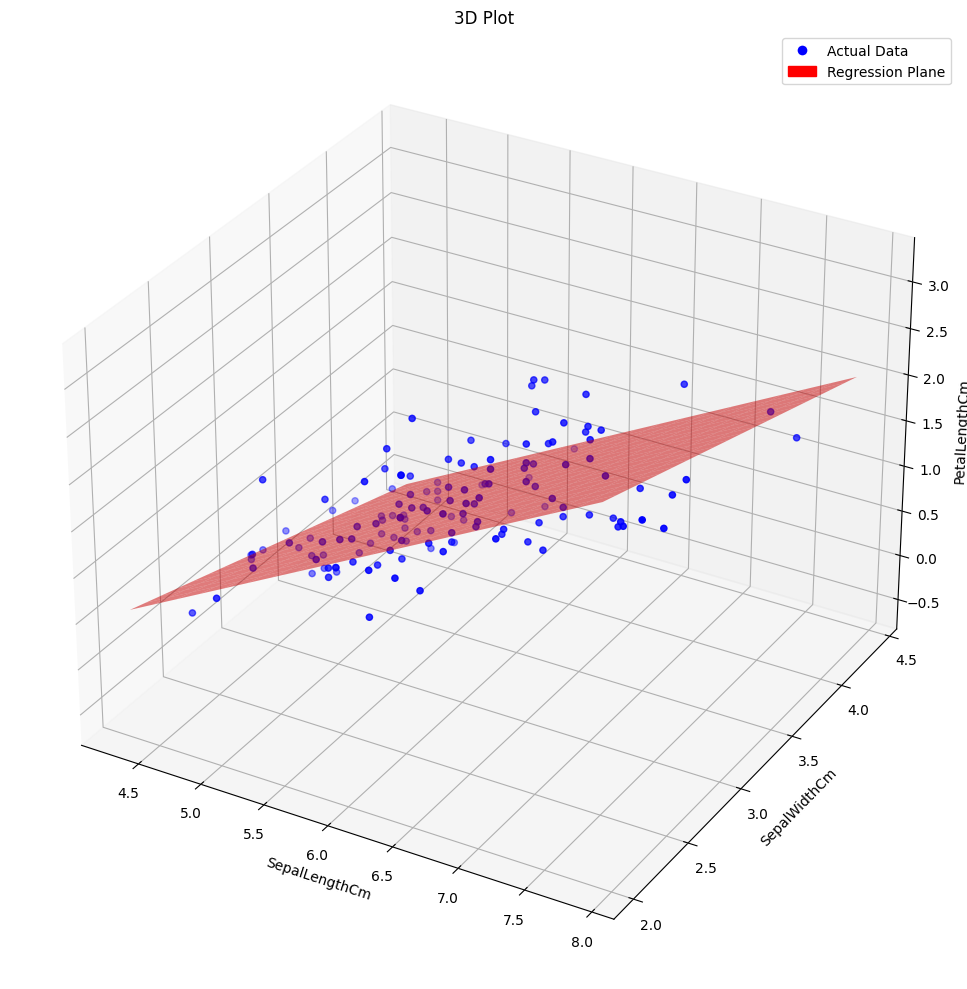

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

data = pd.read_csv("Datasets/Iris.csv")

x = data.iloc[:, 1:3].to_numpy()
y = data.iloc[:, 4:5].to_numpy()
x = np.hstack((np.ones((x.shape[0], 1)), x))

x_t = x.T
beta = np.linalg.inv(x_t @ x) @ x_t @ y

intercept = beta[0][0]
coefficients = beta[1:].flatten()

yp = x @ beta

print("Intercept:", intercept)
print("Coefficients:", coefficients)

x = data.iloc[:, 1:3].to_numpy()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

scatter_plot = ax.scatter(x[:, 0], x[:, 1], y.flatten(), color='blue')

x1_range = np.linspace(x[:, 0].min(), x[:, 0].max(), 20)
x2_range = np.linspace(x[:, 1].min(), x[:, 1].max(), 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_grid = intercept + coefficients[0] * x1_grid + coefficients[1] * x2_grid

surface_plot = ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5, color='red')

ax.set_xlabel("SepalLengthCm")
ax.set_ylabel("SepalWidthCm")
ax.set_zlabel("PetalLengthCm")
ax.set_title("3D Plot")

custom_lines = [
    Line2D([0], [0], marker='o', color='w', label='Actual Data', markerfacecolor='blue', markersize=8),
    Patch(facecolor='red', edgecolor='r', label='Regression Plane')
]
ax.legend(handles=custom_lines)
plt.tight_layout()
plt.show()

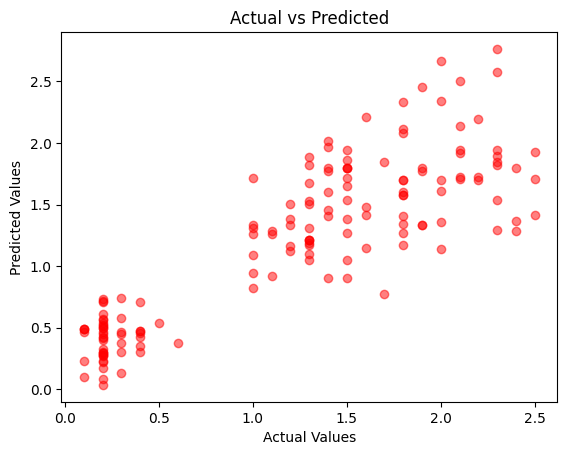

In [58]:
plt.scatter(y, yp, c='r', alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

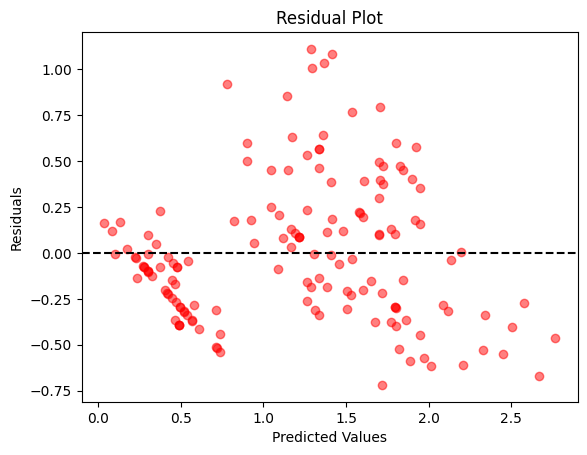

In [59]:
residuals = y - yp
plt.scatter(yp, residuals, c='r', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()